In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import pickle
import joblib

In [2]:
data = pd.read_csv("Real_Estate.csv")


real_estate_data_head = data.head()
data_info = data.info()

print(real_estate_data_head)
print(data_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House_age                            414 non-null    float64
 2   Distance_to_the_nearest_MRT_station  414 non-null    float64
 3   Number_of_convenience_stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House_price_of_unit_area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB
             Transaction date  House_age  Distance_to_the_nearest_MRT_station  \
0  2012-09-02 16:42:30.519336       13.3                            4082.0150   
1  2012-09-04 22:52:29.919544       35.5                             274.0144

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Transaction date                     414 non-null    object 
 1   House_age                            414 non-null    float64
 2   Distance_to_the_nearest_MRT_station  414 non-null    float64
 3   Number_of_convenience_stores         414 non-null    int64  
 4   Latitude                             414 non-null    float64
 5   Longitude                            414 non-null    float64
 6   House_price_of_unit_area             414 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 22.8+ KB


In [4]:
data.describe()

,House_age,Distance_to_the_nearest_MRT_station,Number_of_convenience_stores,Latitude,Longitude,House_price_of_unit_area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,18.405072,1064.468233,4.265700,24.973605,121.520268,29.102149
std,11.757670,1196.749385,2.880498,0.024178,0.026989,15.750935
min,0.000000,23.382840,0.000000,24.932075,121.473888,0.000000
25%,9.900000,289.324800,2.000000,24.952422,121.496866,18.422493
50%,16.450000,506.114400,5.000000,24.974353,121.520912,30.394070
75%,30.375000,1454.279000,6.750000,24.994947,121.544676,40.615184
max,42.700000,6306.153000,10.000000,25.014578,121.565321,65.571716


In [5]:
data.isnull().sum()

Transaction date                       0
House_age                              0
Distance_to_the_nearest_MRT_station    0
Number_of_convenience_stores           0
Latitude                               0
Longitude                              0
House_price_of_unit_area               0
dtype: int64

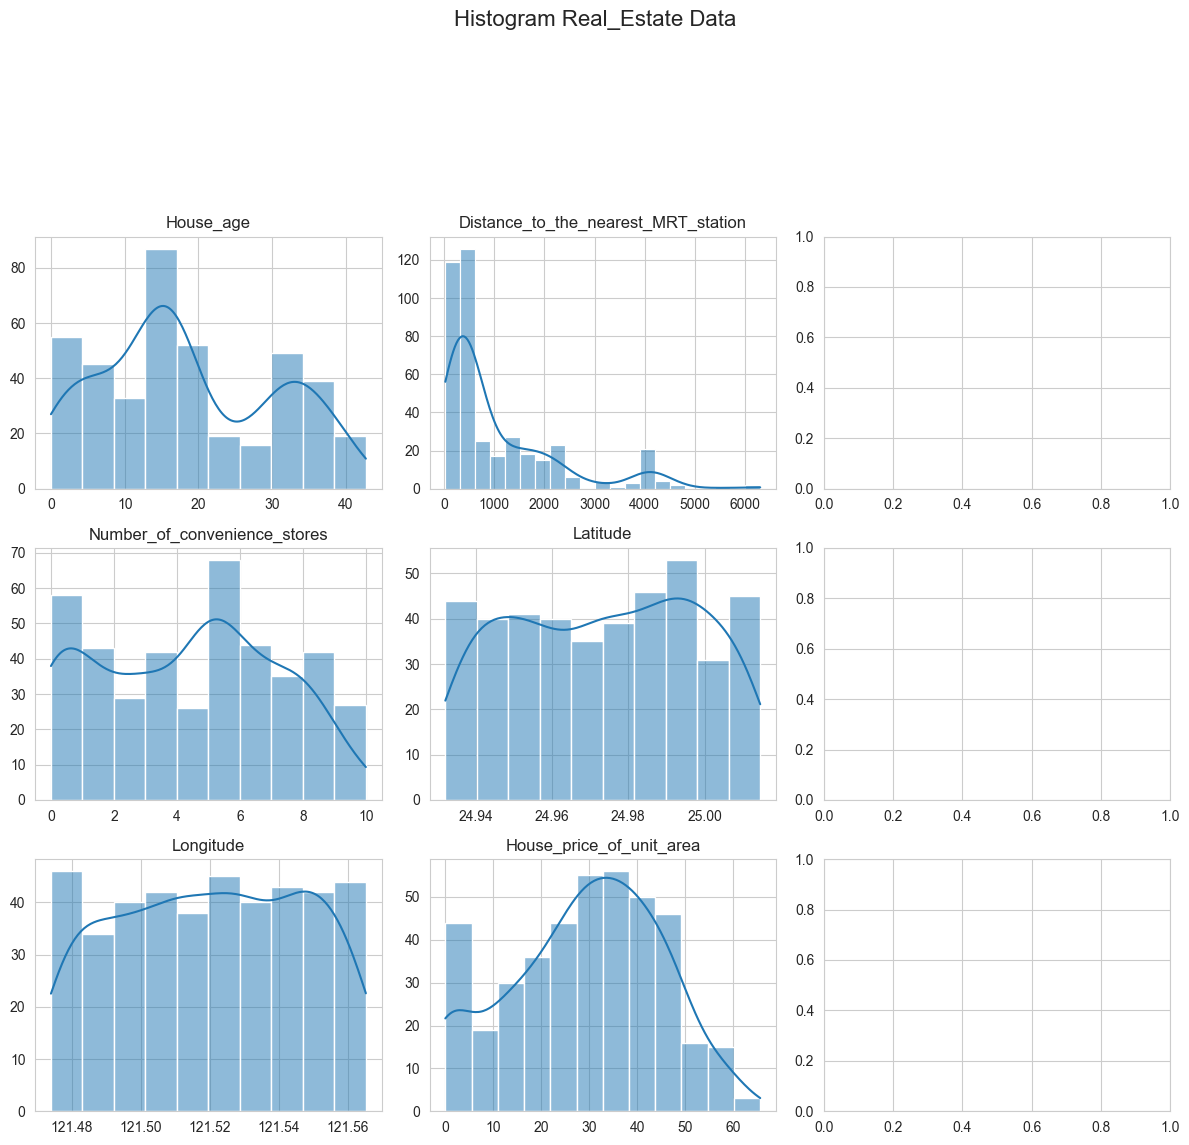

In [6]:
sns.set_style('whitegrid')


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,12))
fig.suptitle('Histogram Real_Estate Data', fontsize=16)


cols = ['House_age', 'Distance_to_the_nearest_MRT_station', 'Number_of_convenience_stores',
        'Latitude', 'Longitude', 'House_price_of_unit_area']

for i,col in enumerate(cols):
    sns.histplot(data[col], kde=True, ax = axes[i//2, i%2])
    axes[i//2, i%2].set_title(col)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

plt.tight_layout(rect=[0,0.03,1,0.85])
plt.show()

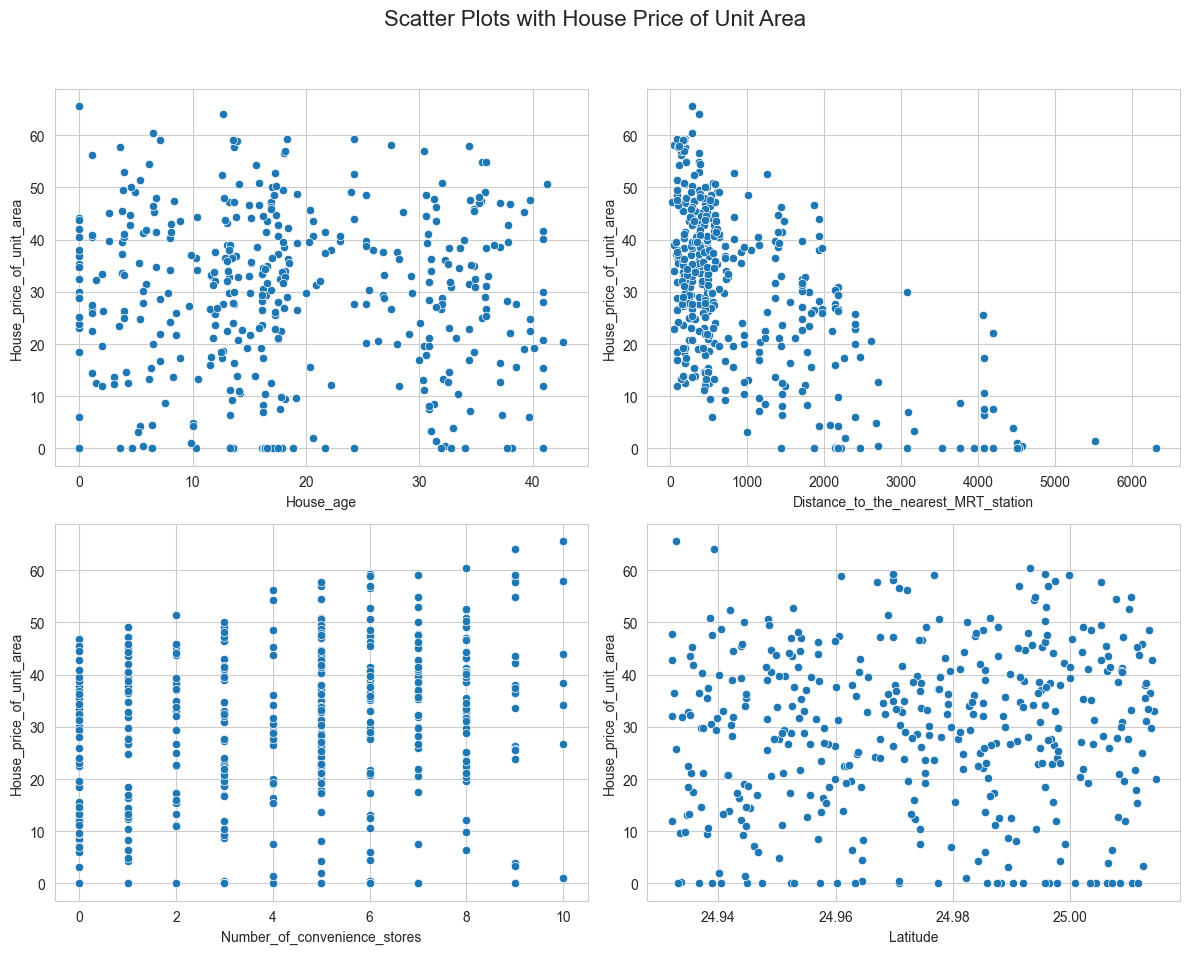

In [7]:
fig,axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
fig.suptitle('Scatter Plots with House Price of Unit Area', fontsize=16)


sns.scatterplot(data=data,x='House_age',y='House_price_of_unit_area',ax=axes[0,0])
sns.scatterplot(data=data, x = 'Distance_to_the_nearest_MRT_station', y='House_price_of_unit_area', ax=axes[0,1])
sns.scatterplot(data=data, x='Number_of_convenience_stores',y = 'House_price_of_unit_area',ax=axes[1,0])
sns.scatterplot(data=data,x='Latitude', y='House_price_of_unit_area', ax=axes[1,1])

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

In [8]:
numeric_data = data.select_dtypes(include='number')

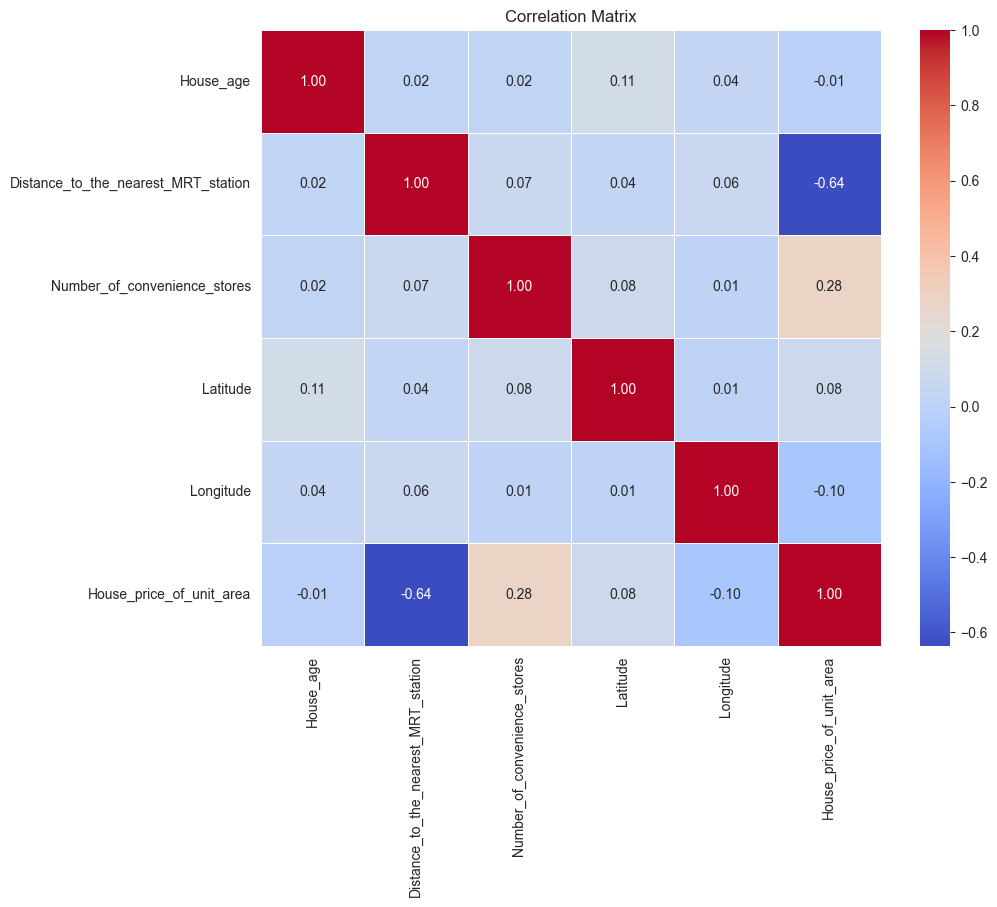

                                     House_age  \
House_age                             1.000000   
Distance_to_the_nearest_MRT_station   0.021596   
Number_of_convenience_stores          0.021973   
Latitude                              0.114345   
Longitude                             0.036449   
House_price_of_unit_area             -0.012284   

                                     Distance_to_the_nearest_MRT_station  \
House_age                                                       0.021596   
Distance_to_the_nearest_MRT_station                             1.000000   
Number_of_convenience_stores                                    0.069015   
Latitude                                                        0.038954   
Longitude                                                       0.064229   
House_price_of_unit_area                                       -0.636579   

                                     Number_of_convenience_stores  Latitude  \
House_age                            

In [9]:
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

print(correlation_matrix)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [11]:
features = ['Distance_to_the_nearest_MRT_station', 'Number_of_convenience_stores', 'Latitude', 'Longitude']
target = 'House_price_of_unit_area'


X = data[features]
Y = data[target]

In [12]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train,Y_train)

LinearRegression()

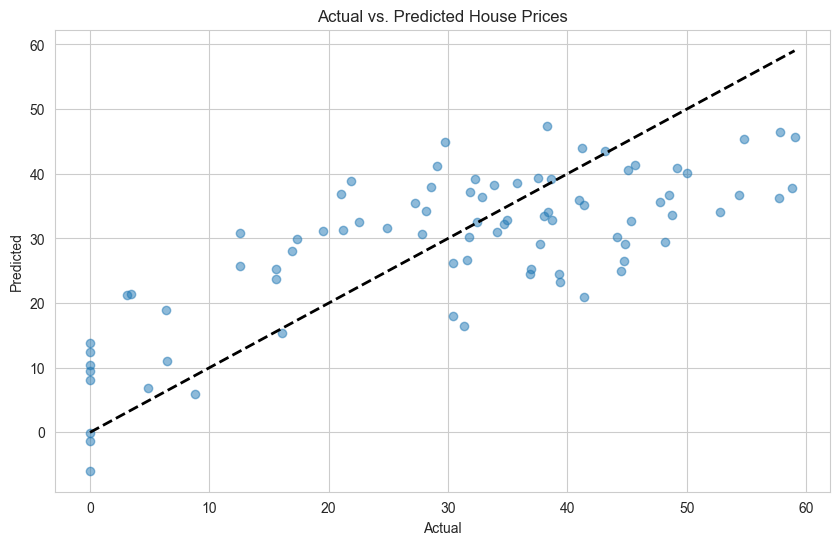

In [13]:
y_pred_lr = model.predict(X_test)

plt.figure(figsize=(10,6))
plt.scatter(Y_test,y_pred_lr, alpha=0.5)
plt.plot([Y_test.min(), Y_test.max()],[Y_test.min(),Y_test.max()],'k--',lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted House Prices')
plt.show()

In [14]:
import numpy as np

user = (4082.0150,8,25.007059,121.528336)
mode = np.array([user])
prediction = model.predict(mode)
print('predicted_price',prediction)

predicted_price [12.31234954]


c:\Users\pc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
X.head()

,Distance_to_the_nearest_MRT_station,Number_of_convenience_stores,Latitude,Longitude
0,4082.0150,8,25.007059,121.561694
1,274.0144,2,25.012148,121.546990
2,1978.6710,10,25.003850,121.528336
3,1055.0670,5,24.962887,121.482178
4,967.4000,6,25.011037,121.479946


In [16]:
model_file = 'Real_Estate_Price_Prediction_new.pkl'

joblib.dump(model,model_file)

['Real_Estate_Price_Prediction_new.pkl']

In [17]:
real_estate_price_prediction = open('Real_Estate_Price_Prediction_new.pkl','rb')
real_est = joblib.load(real_estate_price_prediction)